In [2]:
library(Seurat)
library(SingleR)
library(celldex)

In [19]:
opt=list()

In [39]:
opt$rds="/mnt/ccrsf-static/singlecell_projects/CarolinaBarillasMury_CS039906_16Parselib_081125/Analysis/split_pipe_comb/1V247R/seurat/seur_10x_cluster_object.rds"

In [27]:
opt$sampleid="test_singleR"

In [28]:
opt$genome="hg38"
opt$markerList='/mnt/ccrsf-static/singlecell_projects/CarolinaBarillasMury_CS039906_16Parselib_081125/Analysis/workflow/data/marker_genelist/human_gene_list.csv'
opt$outdir='/mnt/ccrsf-static/singlecell_projects/CarolinaBarillasMury_CS039906_16Parselib_081125/Analysis/test_singleR/'

In [29]:
opt

$opt
[1] "/mnt/ccrsf-static/singlecell_projects/CarolinaBarillasMury_CS039906_16Parselib_081125/Analysis/split_pipe_comb/1V247R/seurat/seur_10x_preprocessed_object.rds"

$sampleid
[1] "test_singleR"

$genome
[1] "hg38"

$markerList
[1] "/mnt/ccrsf-static/singlecell_projects/CarolinaBarillasMury_CS039906_16Parselib_081125/Analysis/workflow/data/marker_genelist/human_gene_list.csv"

$outdir
[1] "/mnt/ccrsf-static/singlecell_projects/CarolinaBarillasMury_CS039906_16Parselib_081125/Analysis/test_singleR/"

$rds
[1] "/mnt/ccrsf-static/singlecell_projects/CarolinaBarillasMury_CS039906_16Parselib_081125/Analysis/split_pipe_comb/1V247R/seurat/seur_10x_preprocessed_object.rds"

In [40]:
seur <- readRDS(opt$rds)

In [41]:
opt$rds

[1] "/mnt/ccrsf-static/singlecell_projects/CarolinaBarillasMury_CS039906_16Parselib_081125/Analysis/split_pipe_comb/1V247R/seurat/seur_10x_cluster_object.rds"

In [42]:
sce <- as.SingleCellExperiment(seur)


Warning message:
“Layer ‘data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”


In [43]:
sce <- scater::logNormCounts(sce)

In [44]:
geneList <- read.csv(opt$markerList, header=FALSE, row.names=1, stringsAsFactors = FALSE)

In [45]:
hpca <- readRDS("/home/docker/HumanPrimaryCellAtlasData.rds")
  blueprint <- readRDS("/home/docker/BlueprintEncodeData.rds")
  pred.multi <- SingleR(test = sce,
      ref = list(BP=blueprint, HPCA=hpca),
      labels = list(blueprint$label.main, hpca$label.main))

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message in max(data$density, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`.
Caused by error in `$<-.data.frame`:
! replacement has 1 row, data has 0”


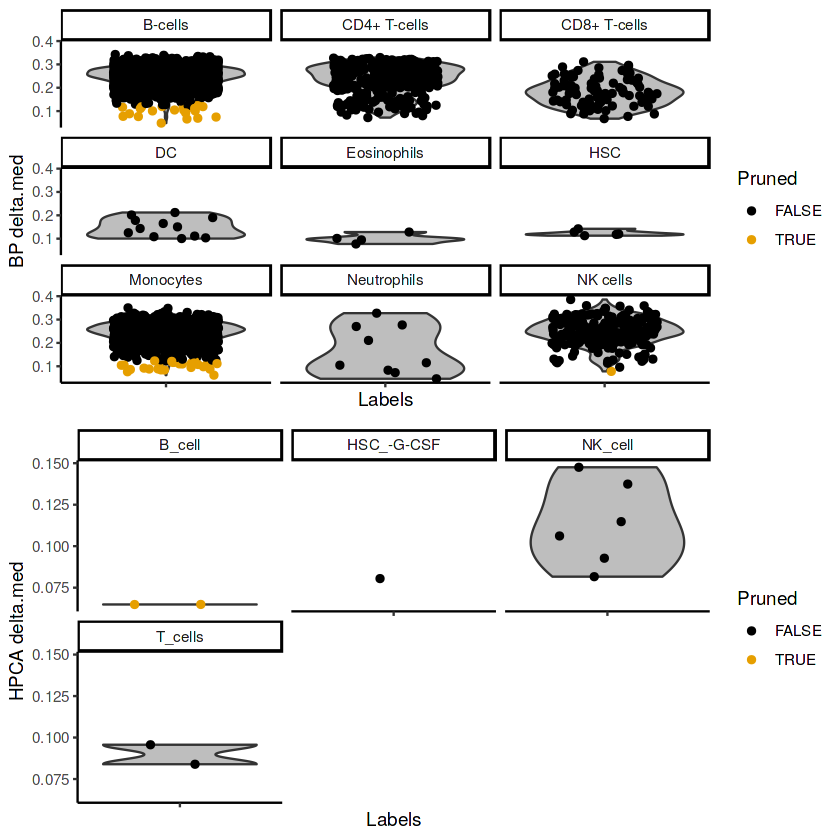

In [46]:
plotDeltaDistribution(pred.multi, show = "delta.med", ncol = 3)

In [47]:
head(pred.multi)

DataFrame with 6 rows and 5 columns
                         scores       labels pruned.labels reference
                       <matrix>  <character>   <character> <integer>
58_01_27__s1 NA:NA:      NA:...     NK cells      NK cells         1
58_02_06__s1 NA:NA:0.305219:...      B-cells       B-cells         1
58_02_18__s1 NA:NA:      NA:... CD4+ T-cells  CD4+ T-cells         1
58_02_31__s1 NA:NA:0.274983:...      B-cells       B-cells         1
58_02_92__s1 NA:NA:0.156727:...      B-cells       B-cells         1
58_03_95__s1 NA:NA:0.285301:...      B-cells       B-cells         1
                                                                                                                    orig.results
                                                                                                                     <DataFrame>
58_01_27__s1     0.0851393:-0.00707716:0.182899:...:NK cells:0.0110398:...:0.0377513:0.148327:0.108197:...:T_cells:0.0618438:...
58_02_06__s1       0.1217

In [50]:
getDeltaFromMedian(pred.multi)

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [25] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [49] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [73] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [97] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [121] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [145] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [193] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [217] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [241] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [265] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [289] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [313] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [337] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [361] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [385] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [409] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [433] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [457] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [481] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [505] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [529] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [553] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [577] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [601] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [625] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [649] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [673] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [697] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [721] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [745] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [769] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [793] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [817] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [841] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [865] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [889] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [913] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [937] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [961] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [985] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1009] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1033] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1057] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1081] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1105] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1129] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1153] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1177] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1201] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA N

In [51]:
example(SingleR, echo=FALSE)

In [52]:
head(pred)

DataFrame with 6 rows and 4 columns
                                  scores      labels delta.next pruned.labels
                                <matrix> <character>  <numeric>   <character>
1 0.03468310: 0.1438080: 0.000133937:...           B  0.1091249             B
2 0.01116249:-0.0118974: 0.033596552:...           E  0.0782812             E
3 0.00646692: 0.0374335: 0.003394443:...           E  0.1082037             E
4 0.03731439: 0.0847519:-0.027054276:...           B  0.0646572             B
5 0.01756420: 0.1155103:-0.000767107:...           B  0.0899581             B
6 0.01498408: 0.0419905:-0.012138202:...           D  0.0673694             D

In [53]:
getDeltaFromMedian(pred)

[1] 0.12692619 0.09099261 0.06948715 0.04743755 0.09794613 0.04386441
  [7] 0.08915338 0.07970024 0.03785877 0.07535071 0.05566952 0.05959751
 [13] 0.10663675 0.08598538 0.08068308 0.11954312 0.04737772 0.11612873
 [19] 0.04009967 0.14082469 0.07945685 0.07740931 0.11163719 0.07326996
 [25] 0.08808166 0.09335819 0.08630901 0.09102277 0.10295986 0.05720465
 [31] 0.09386796 0.09014255 0.12977847 0.05583568 0.06472053 0.07921854
 [37] 0.04308858 0.09674238 0.05666299 0.08011410 0.06557767 0.03495518
 [43] 0.07921340 0.09234398 0.02621110 0.08027590 0.05802644 0.08952021
 [49] 0.05612082 0.02586750 0.04521470 0.06507060 0.07808089 0.03607303
 [55] 0.09177261 0.11272775 0.07521301 0.07681451 0.11568919 0.09469856
 [61] 0.06093504 0.07856441 0.09120816 0.07531438 0.07571979 0.06394550
 [67] 0.08051154 0.07261377 0.06602982 0.08398860 0.05468537 0.04837592
 [73] 0.10950236 0.04978343 0.03426946 0.11521304 0.08592309 0.04212134
 [79] 0.08562999 0.06737699 0.10476766 0.07291417 0.03592585 0.06558748
 [85] 0.08838105 0.07635215 0.07824168 0.05982936 0.07605789 0.08876196
 [91] 0.06540721 0.12221276 0.05359823 0.08019397 0.08917198 0.10389613
 [97] 0.06591721 0.09161592 0.08022235 0.13857806